In [ ]:
import transformers 
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
import torch.nn as nn
import numpy as np


In [3]:
import pandas as pd
import os
# Load dataset 
df = pd.read_csv("./data/sentimentDataset.csv", encoding="ISO-8859-1")

# Drop the ID column if it exists
if "ItemID" in df.columns:
    df.drop(columns=["ItemID"], inplace=True)

# Trim dataset to 100000 rows
df = df.head(10000)

# Save the processed dataset
output_path = "./data/processed/sentiment_data.csv"
df.to_csv(output_path, index=False)


print(df.head())
print(df.isnull().sum())
print(df.info())
print(df["Sentiment"].value_counts())

   Sentiment                                      SentimentText
0          0                       is so sad for my APL frie...
1          0                     I missed the New Moon trail...
2          1                            omg its already 7:30 :O
3          0            .. Omgaga. Im sooo  im gunna CRy. I'...
4          0           i think mi bf is cheating on me!!!   ...
Sentiment        0
SentimentText    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sentiment      10000 non-null  int64 
 1   SentimentText  10000 non-null  object
dtypes: int64(1), object(1)
memory usage: 156.4+ KB
None
Sentiment
0    5812
1    4188
Name: count, dtype: int64


There is no imbalance in data that's good

In [4]:
print("SHAPE::",df.shape)

SHAPE:: (10000, 2)


In [5]:
df.head()

,Sentiment,SentimentText
0,0,is so sad for my APL frie...
1,0,I missed the New Moon trail...
2,1,omg its already 7:30 :O
3,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,0,i think mi bf is cheating on me!!! ...


C:\Users\systems\AppData\Local\Temp\ipykernel_17596\955251005.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Sentiment"], palette="viridis")


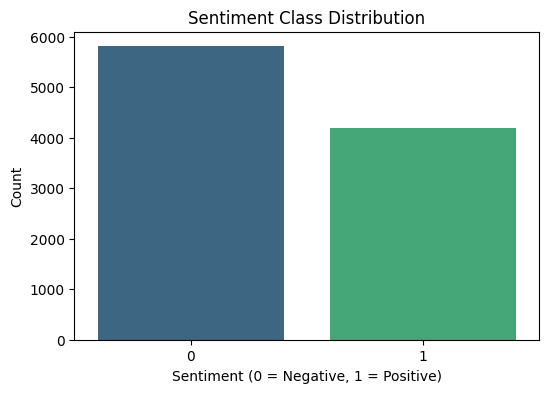

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualizing class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df["Sentiment"], palette="viridis")
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment (0 = Negative, 1 = Positive)")
plt.ylabel("Count")
plt.show()


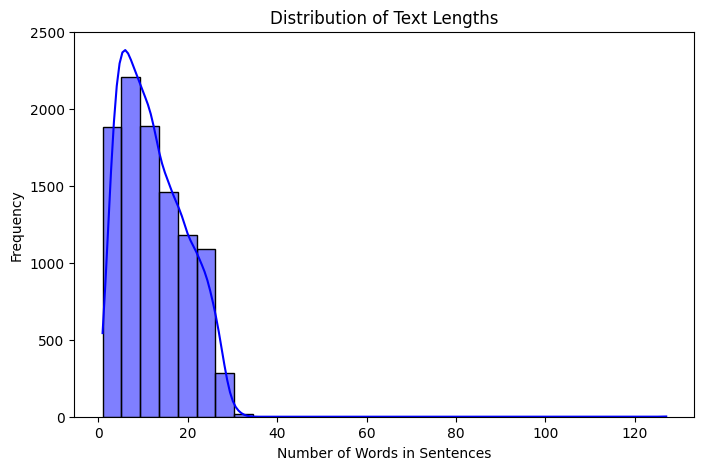

In [7]:
df["text_length"] = df["SentimentText"].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8, 5))
sns.histplot(df["text_length"], bins=30, kde=True, color="blue")
plt.title("Distribution of Text Lengths")
plt.xlabel("Number of Words in Sentences")
plt.ylabel("Frequency")
plt.show()

In [8]:
# Generate WordClouds
positive_text = " ".join(df[df["Sentiment"] == 1]["SentimentText"])
negative_text = " ".join(df[df["Sentiment"] == 0]["SentimentText"])

In [15]:
# **Splitting Data into Train and Test**
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df["Sentiment"])

# Save train and test datasets
train_df.to_csv("./data/processed/train.csv", index=False)
test_df.to_csv("./data/processed/test.csv", index=False)

print("\nTrain Shape:", train_df.shape)
print("Test Shape:", test_df.shape)


Train Shape: (8000, 3)
Test Shape: (2000, 3)


In [16]:
from transformers import BertTokenizer

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenization function
def tokenize_data(text, max_len=128):
    return tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_len,
        padding='max_length',
        return_attention_mask=True,
        return_tensors='pt',
        truncation=True
    )

# Example tokenization
sample_text = train_df['SentimentText'].iloc[0]
tokens = tokenize_data(sample_text)
print(tokens)


e:\ProjectsAI\sentiment-analysis-transformer\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
e:\ProjectsAI\sentiment-analysis-transformer\env\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\systems\.cache\huggingface\hub\models--bert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In

{'input_ids': tensor([[  101,  1001, 25933, 20784, 24997, 13535,  2099,  2003,  2437,  2033,
          2514,  2214,  2021,  1010,  7167,  1997,  2204, 12369,   999,   102,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,  

In [17]:
import torch
from torch.utils.data import Dataset

class SentimentDataset(Dataset):
    def __init__(self, df, tokenizer, max_len=128):
        self.texts = df['SentimentText'].values
        self.labels = df['Sentiment'].values
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = tokenize_data(text, self.max_len)
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# Create datasets
train_dataset = SentimentDataset(train_df, tokenizer)
test_dataset = SentimentDataset(test_df, tokenizer)


In [18]:
from transformers import BertForSequenceClassification, DistilBertForSequenceClassification, RobertaForSequenceClassification

# Initialize models
bert_model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)
distilbert_model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)
roberta_model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
e:\ProjectsAI\sentiment-analysis-transformer\env\Lib\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\systems\.cache\huggingface\hub\models--distilbert-base-uncased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Pyt

In [19]:
from transformers import AdamW, get_linear_schedule_with_warmup
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score

def train_model(model, train_dataset, val_dataset, epochs=3, batch_size=16):
    # Data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)

    # Optimizer and scheduler
    optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
    total_steps = len(train_loader) * epochs
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

    # Training loop
    for epoch in range(epochs):
        model.train()
        total_train_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()
            outputs = model(
                input_ids=batch['input_ids'],
                attention_mask=batch['attention_mask'],
                labels=batch['labels']
            )
            loss = outputs.loss
            total_train_loss += loss.item()
            loss.backward()
            optimizer.step()
            scheduler.step()

        avg_train_loss = total_train_loss / len(train_loader)
        print(f'Epoch {epoch + 1}/{epochs} - Training loss: {avg_train_loss:.4f}')

        # Validation
        model.eval()
        total_val_accuracy = 0
        with torch.no_grad():
            for batch in val_loader:
                outputs = model(
                    input_ids=batch['input_ids'],
                    attention_mask=batch['attention_mask']
                )
                logits = outputs.logits
                preds = torch.argmax(logits, dim=1).flatten()
                accuracy = accuracy_score(batch['labels'].cpu(), preds.cpu())
                total_val_accuracy += accuracy

        avg_val_accuracy = total_val_accuracy / len(val_loader)
        print(f'Epoch {epoch + 1}/{epochs} - Validation Accuracy: {avg_val_accuracy:.4f}')


In [ ]:
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_subset, val_subset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

print("Training BERT model")
train_model(bert_model, train_subset, val_subset)

# Train DistilBERT model
print("\nTraining DistilBERT model")
train_model(distilbert_model, train_subset, val_subset)

# Train RoBERTa model
print("\nTraining RoBERTa model")
train_model(roberta_model, train_subset, val_subset)


Training BERT model...


e:\ProjectsAI\sentiment-analysis-transformer\env\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score

def evaluate_model(model, test_dataset, batch_size=16):
    test_loader = DataLoader(test_dataset, batch_size=batch_size)
    model.eval()
    total_test_accuracy = 0
    total_batches = 0

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=1).flatten()

            accuracy = accuracy_score(labels.cpu(), preds.cpu())
            total_test_accuracy += accuracy
            total_batches += 1

    avg_test_accuracy = total_test_accuracy / total_batches
    return avg_test_accuracy

# Evaluate models
bert_accuracy = evaluate_model(bert_model, test_dataset)
distilbert_accuracy = evaluate_model(distilbert_model, test_dataset)
roberta_accuracy = evaluate_model(roberta_model, test_dataset)

print(f"BERT Test Accuracy: {bert_accuracy:.4f}")
print(f"DistilBERT Test Accuracy: {distilbert_accuracy:.4f}")
print(f"RoBERTa Test Accuracy: {roberta_accuracy:.4f}")
